# Diabetes prediction with Logistic regression

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Fetching the dataset

In [18]:
df = pd.read_csv('diabetes.csv')

correlations = df.corr()['Outcome'].drop('Outcome')
features = correlations[correlations >= 0.0]
featureNames = [name for name, cor in features.iteritems()]

featureNames

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Splitting the dataset

In [19]:
from sklearn.model_selection import train_test_split

mX = df[featureNames]
my = df['Outcome']

X, X_test, y, y_test = train_test_split(mX, my, test_size = 0.3, random_state = 3)

(m, n) = X.shape

### Correlation Heat Map

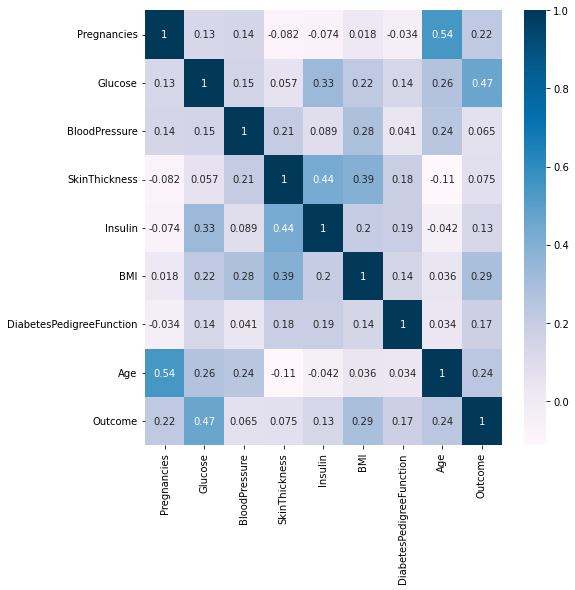

In [20]:
import seaborn as sns

plt.figure(figsize = (n, n))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.PuBu)

plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)

lr.fit(X, y)

LogisticRegression(max_iter=1000)

In [22]:
predictions = lr.predict(X_test)

In [23]:
dif = predictions - y_test

correct = len(dif[dif == 0])

print(f'Efficiency of the model : {correct * 100 / len(X_test)}')

Efficiency of the model : 75.32467532467533


In [24]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, predictions)
con

array([[118,  15],
       [ 42,  56]], dtype=int64)